## Seminario :: Analisi statistica spaziale di alcune proprietà dei suoli

### Laurea magistrale in scienze forestali ed ambientali
### corso di Geografia e Valutazione del suolo

Giuliano Langella<br>
glangella@unina.it

#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Step #2: Esempio applicativo, analisi spaziale dell'andicità

#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

##### Andicità:

$$Andicità = Al_{ossalato} + \frac{1}{2} Fe_{ossalato}$$

### D E F s

In [4]:
# gdalwarp -tr 3000 3000 work/People/Michela/andosols_spatstat/dem_20m_ispra/dtm_20m_32.tif ~/git/seminars/GeogrValutSuolo/dtm_3km_32.tif
printf <- function(...) cat(sprintf(...))

##### Requirements:

In [7]:
#_________________
#
# P A C K A G E S
#_________________
require("ggplot2")
require("gridExtra")
require("dismo")
library("gstat")
require("rgdal")
library("sp")
library("raster")
#library("methods")
#library("geoR")
#library(plyr)

# to be included:
#require("soilprofile")

Loading required package: rgdal
rgdal: version: 1.2-7, (SVN revision 660)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-4 


##### Import data (Biosoil Proj):

In [8]:
D<-read.table(file="~/git/seminars/GeogrValutSuolo/D_cl-o-r_corr.txt",header = T, sep=",")

##### Sommario dei dati:

In [9]:
names(D)

[1] "depth"          "Stmax"          "Stavg"          "EndP"          
 [5] "MaxP"           "MaxV"           "RanV"           "RtUp"          
 [9] "RtDn"           "TINDVI"         "Easting_32632"  "Northing_32632"
[13] "elev"           "asp"            "slo"            "tri"           
[17] "Al05Fe"

In [10]:
summary(D[,c(1,17,13,14,15)])

     depth            Al05Fe             elev             asp        
 Min.   :0.0450   Min.   :0.02244   Min.   :   6.0   Min.   :  0.00  
 1st Qu.:0.0500   1st Qu.:0.17428   1st Qu.: 505.5   1st Qu.: 53.35  
 Median :0.1500   Median :0.32569   Median : 819.0   Median :148.39  
 Mean   :0.2329   Mean   :0.51684   Mean   : 894.7   Mean   :161.90  
 3rd Qu.:0.3000   3rd Qu.:0.55783   3rd Qu.:1215.5   3rd Qu.:262.41  
 Max.   :0.7000   Max.   :4.61270   Max.   :2500.0   Max.   :359.44  
      slo        
 Min.   :  0.00  
 1st Qu.: 21.36  
 Median : 36.39  
 Mean   : 39.67  
 3rd Qu.: 53.40  
 Max.   :113.58  

In [11]:
#cor( D[,c(17,1,11:16)] ) # , na.rm = TRUE
cor( D[,17],D[,c(1,11:16)] ) # , na.rm = TRUE

depth,Easting_32632,Northing_32632,elev,asp,slo,tri
0.03820968,0.2891981,-0.1817987,0.2453216,-0.1150911,0.1537471,0.1311544


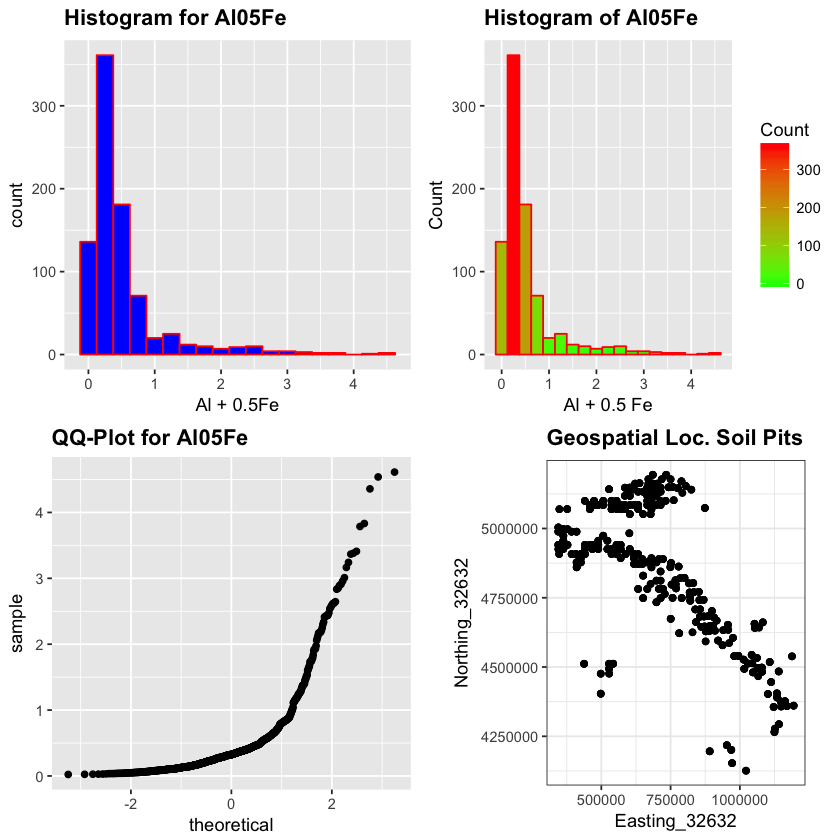

In [12]:
plt0 <- qplot(D$Al05Fe,geom="histogram",binwidth = 0.25,main = "Histogram for Al05Fe",fill=I("blue"),col=I("red"),xlab = "Al + 0.5Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt1 <- ggplot(data=D,aes(D$Al05Fe)) + geom_histogram(binwidth = 0.25,col="red",aes(fill=..count..)) + scale_fill_gradient("Count", low = "green", high = "red") + ggtitle("Histogram of Al05Fe") + theme(plot.title = element_text(lineheight=.8, face="bold")) + labs(x="Al + 0.5 Fe", y="Count")
plt2 <- qplot(Easting_32632, Northing_32632, data=D) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Geospatial Loc. Soil Pits") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt3 <- ggplot(D, aes(sample=Al05Fe))+stat_qq() + ggtitle("QQ-Plot for Al05Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
grid.arrange(plt0,plt1,plt3,plt2,ncol=2,nrow=2)

##### Plot Andicity by depth: [Note: add a soil profile ID]

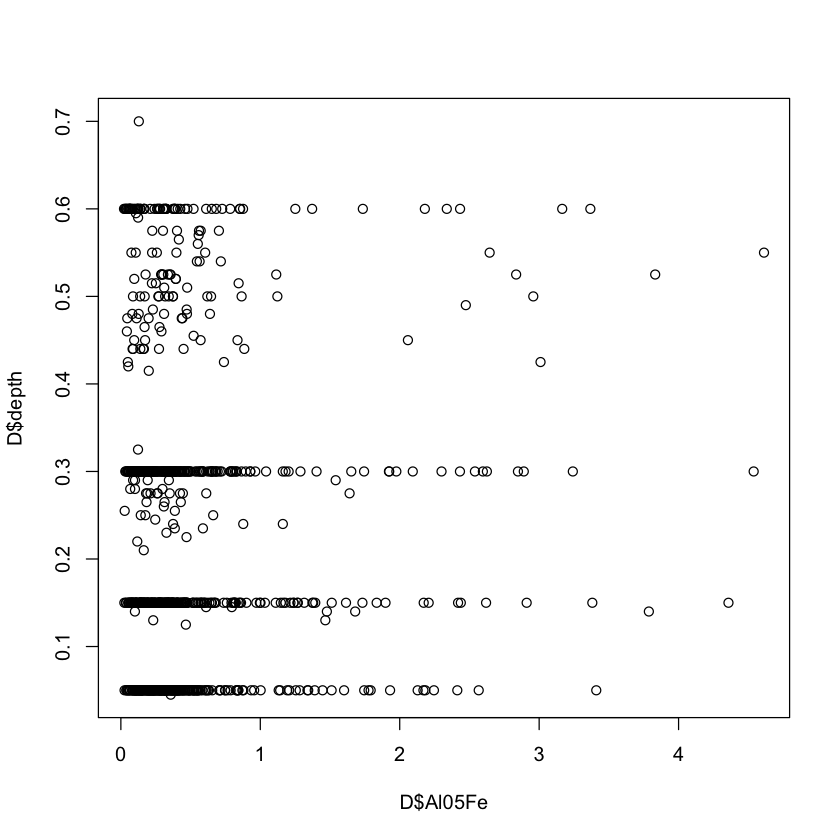

In [13]:
#prof.D <- build.profile(D)
#eplot(prof.D,  Corg , col= black , type= b , main= Example, xlab= Organic C (percent) , ylab= Depth )
plot(D$Al05Fe,D$depth)

#library(plyr)
#pp<-ddply( D,.(depth),summarize, Andicity = round(mean(Al05Fe),2) )

#require(matplot)
#dat <- matrix(runif(40,1,20),ncol=4) # make data
#matplot(dat, type = c("b"),pch=1,col = 1:4) #plot
#legend("topleft", legend = 1:4, col=1:4, pch=1) # optional legend

##### Visualizzazione dei punti di campionamento:

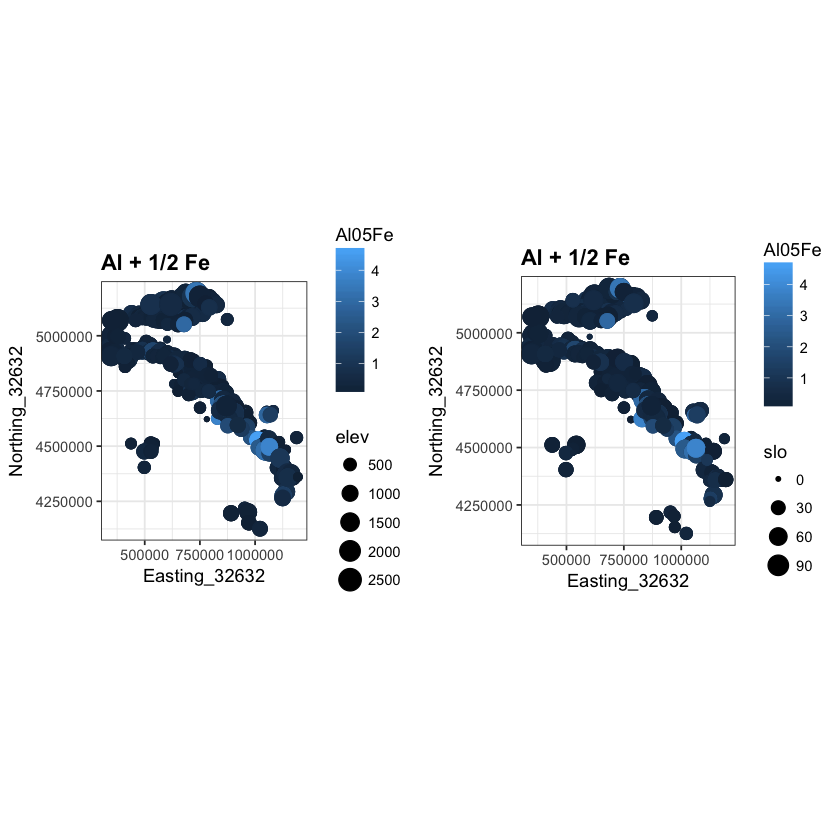

In [14]:
plt1 <- qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=elev) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Al + 1/2 Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt2 <- qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=slo) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Al + 1/2 Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,ncol=2,nrow=1)
#qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=elev) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Effect of elevation on (Al + 1/2 Fe)") + theme(plot.title = element_text(lineheight=.8, face="bold"))
#qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=slo ) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Effect of slope on (Al + 1/2 Fe)") + theme(plot.title = element_text(lineheight=.8, face="bold"))

##### Geospatial location of soil pits (Biosoil Proj):

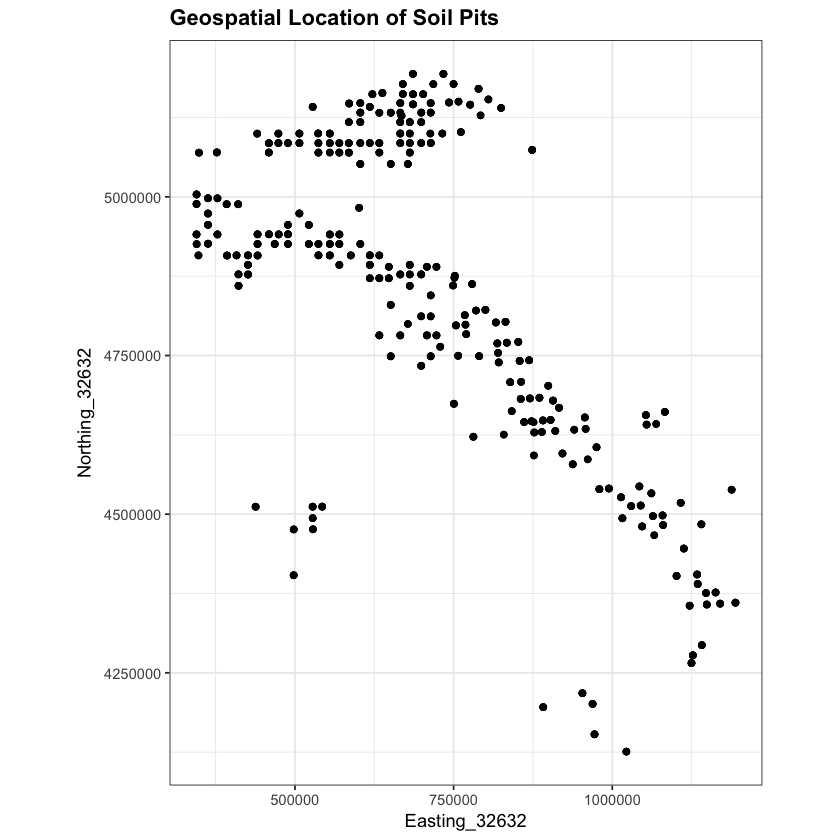

In [15]:
# see
#  http://stackoverflow.com/questions/41787313/how-to-create-a-grid-of-spatial-points
#  https://pakillo.github.io/R-GIS-tutorial/
it <- getData('GADM', country = 'IT', level = 1)
campania <- it[it$NAME_1 == "Campania",]
qplot(Easting_32632, Northing_32632, data=D) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Geospatial Location of Soil Pits") + theme(plot.title = element_text(lineheight=.8, face="bold"))

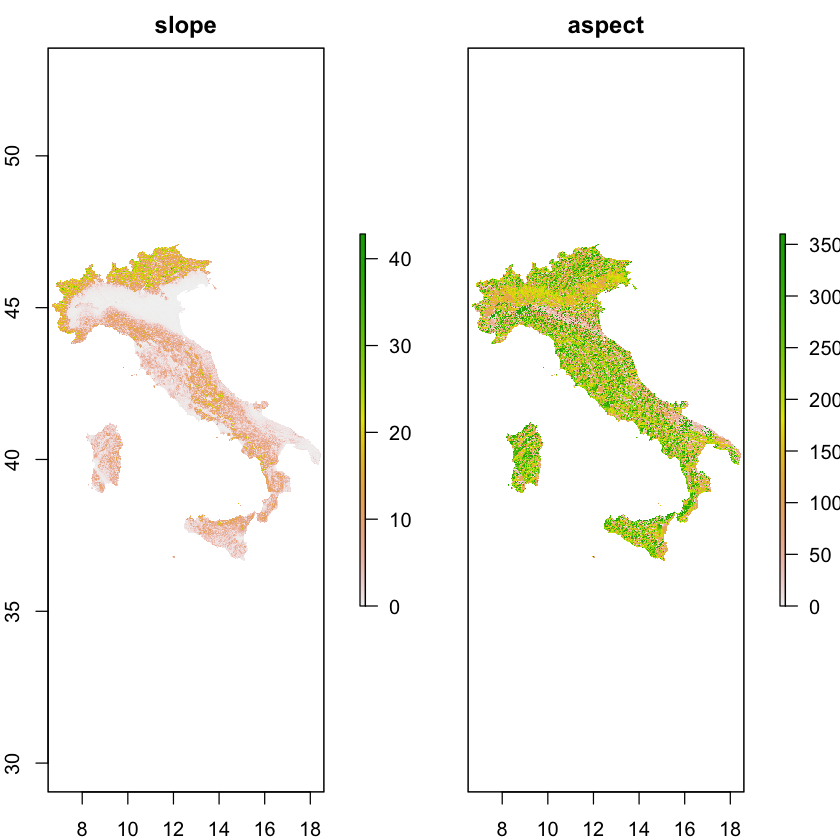

In [11]:
elevation <- getData("alt", country = "IT")
# Some quick maps:
x <- terrain(elevation, opt = c("slope", "aspect"), unit = "degrees")
plot(x)

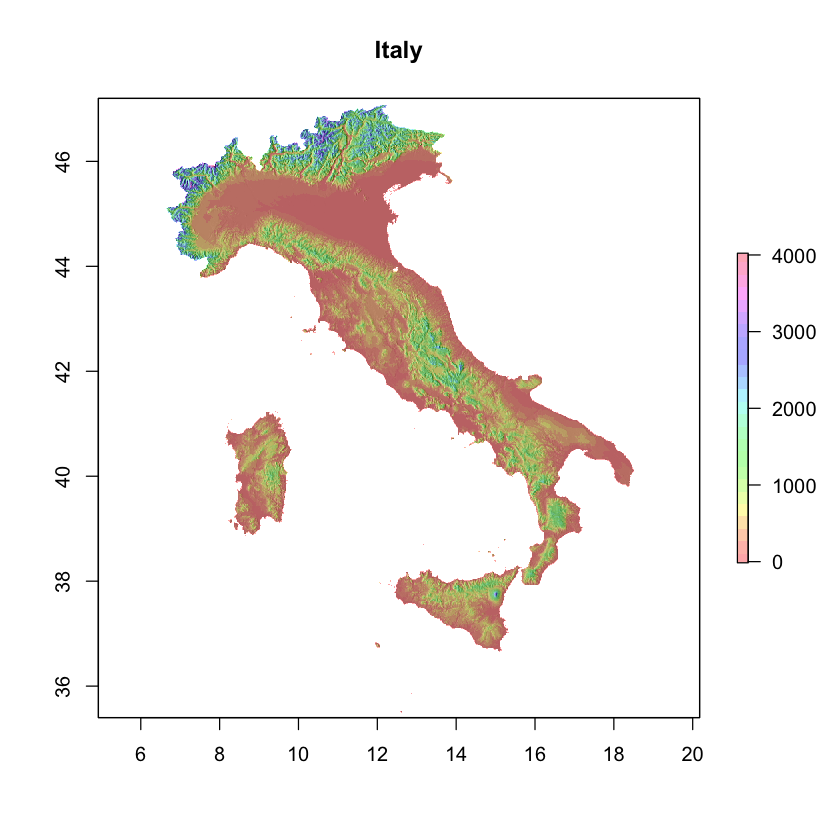

In [24]:
slope <- terrain(elevation, opt = "slope")
aspect <- terrain(elevation, opt = "aspect")
hill <- hillShade(slope, aspect, 40, 270)
plot(hill, col = grey(0:100/100), legend = FALSE, main = "Italy")
plot(elevation, col = rainbow(25, alpha = 0.35), add = TRUE)
# to add points I have to set a ref system and change it equal to hill!
#plot(D$Easting_32632, D$Northing_32632, add = TRUE)

In [16]:
# data
Ds <- D
coordinates(Ds) = ~Easting_32632+Northing_32632

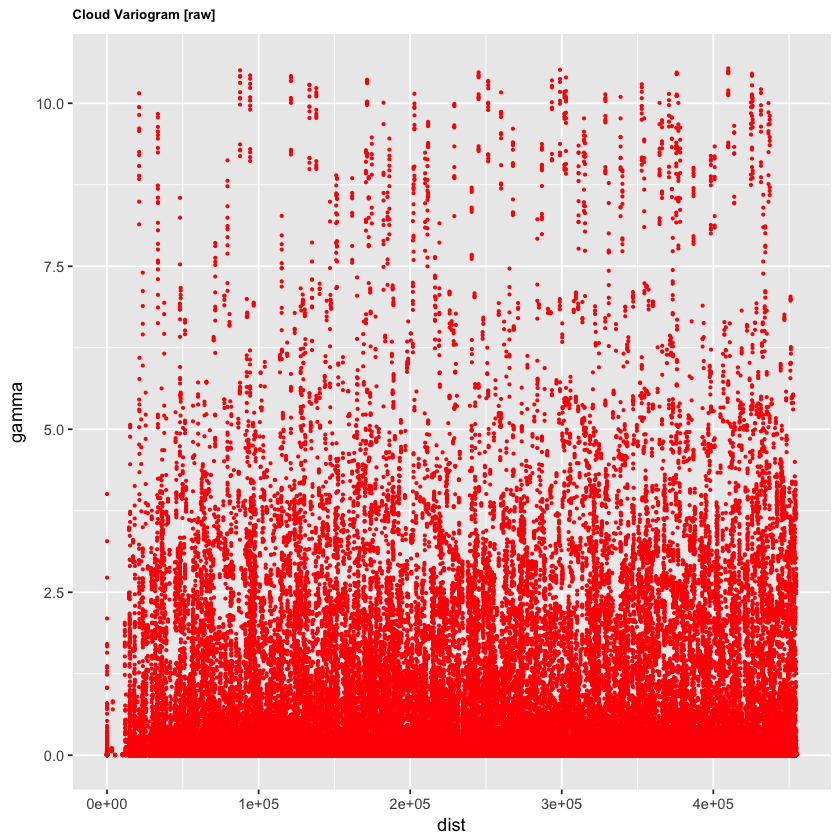

In [17]:
vgm.exp.raw.cloud = variogram( Al05Fe~1, Ds, cloud=TRUE )
ggplot(data=vgm.exp.raw.cloud,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Cloud Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))

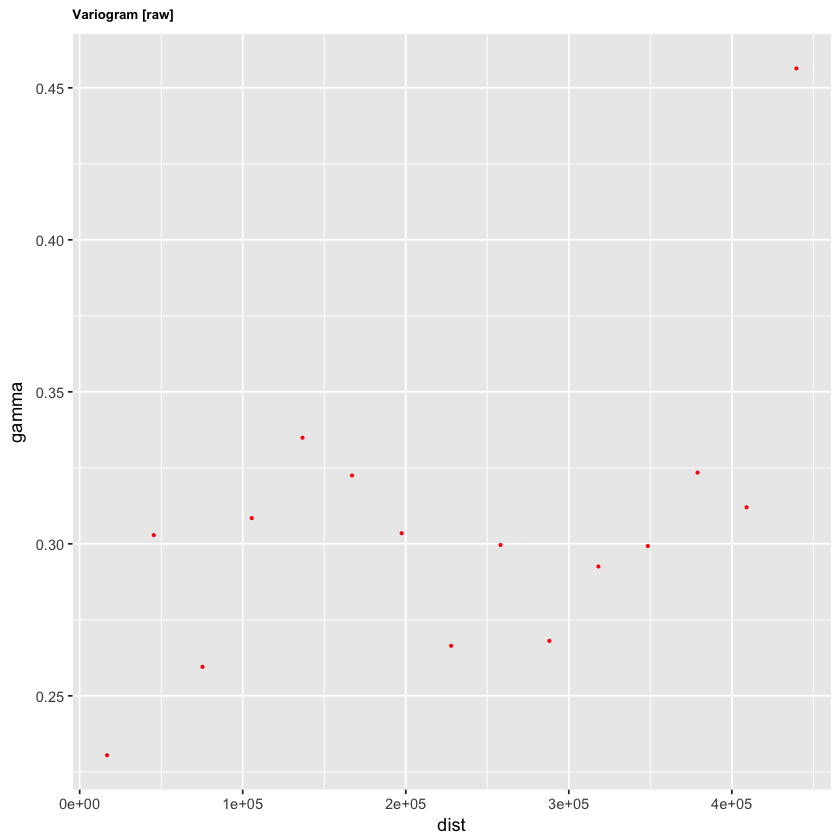

In [18]:
vgm.exp.raw = variogram( Al05Fe~1, Ds )
ggplot(data=vgm.exp.raw,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))

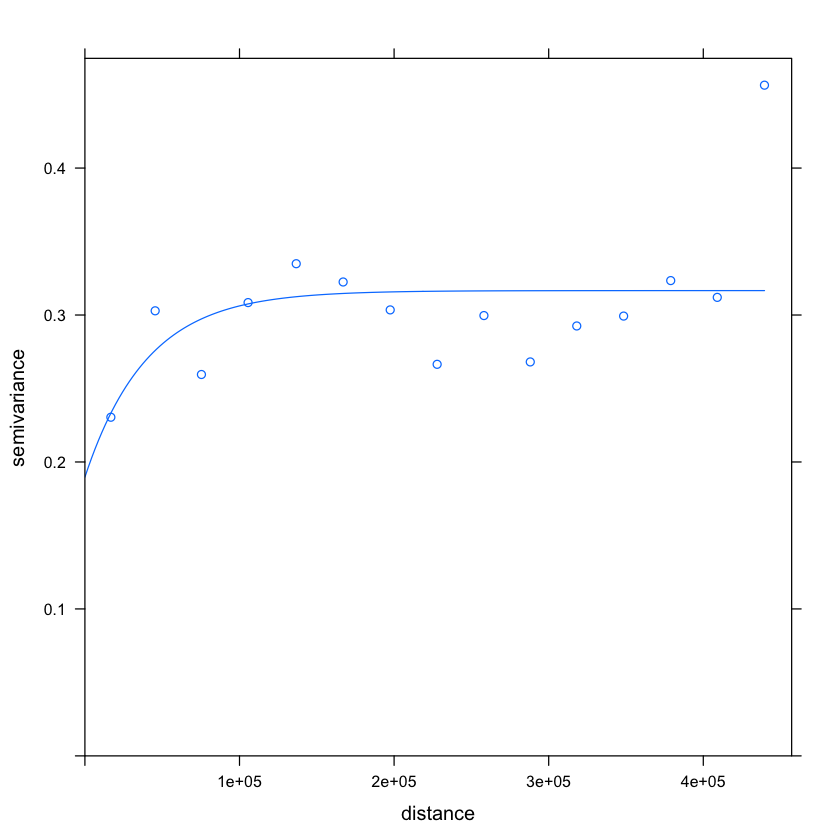

In [19]:
psill 	= 0.27
range 	= 0.4e+05
nugget 	= 0.05
vgm.fit.raw = fit.variogram( vgm.exp.raw, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plot(vgm.exp.raw,vgm.fit.raw)

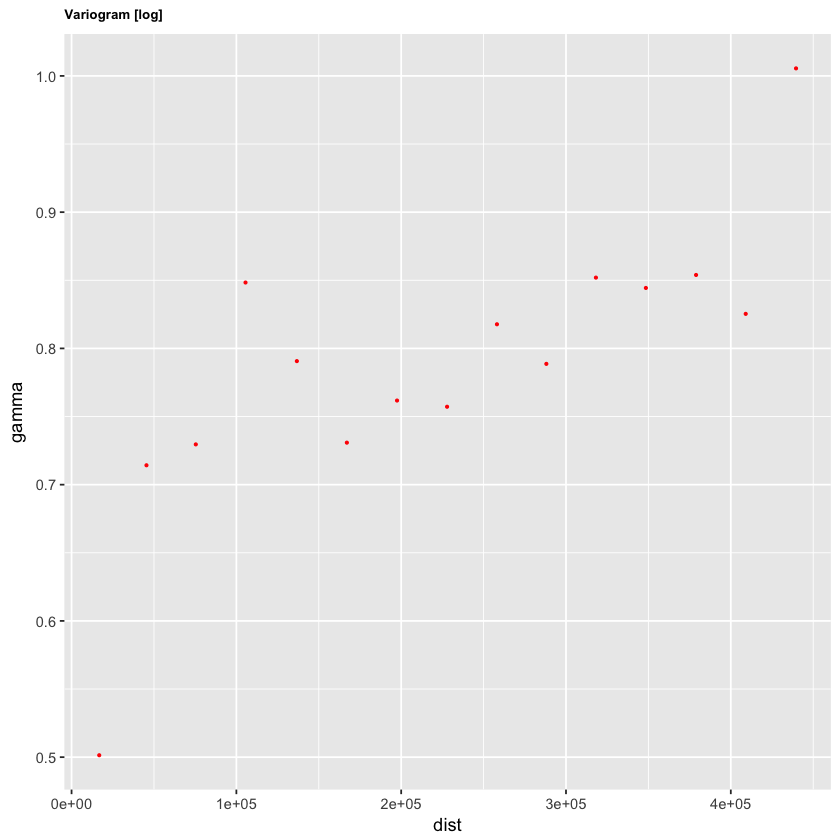

In [22]:
vgm.exp.log = variogram( log(Al05Fe)~1, Ds )
ggplot(data=vgm.exp.log,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))

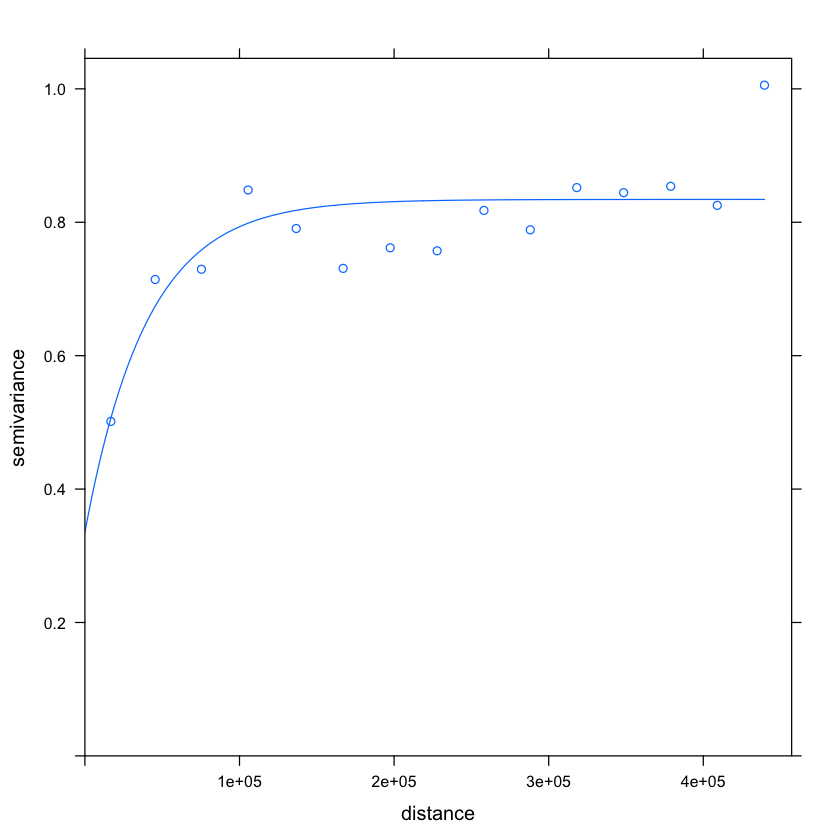

In [23]:
psill 	= 0.27
range 	= 0.4e+05
nugget 	= 0.05
vgm.fit.log = fit.variogram( vgm.exp.log, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plot(vgm.exp.log,vgm.fit.log)

In [24]:
class(elevation)
elevation
proj4string(elevation)
#is.projected(elevation)

ERROR: Error in eval(expr, envir, enclos): object 'elevation' not found


In [70]:
#el_32632 <- spTransform(elevation, CRS("+init=epsg:32632"))
#el_32632 <- projectRaster(elevation, proj4string(elevation))

In [ ]:
# Example
x <- c(7.173500, 7.172540, 7.171636, 7.180180, 7.178070, 7.177229, 7.175240, 7.181409, 7.179299)
y <- c(45.86880, 45.86887, 45.86924, 45.87158, 45.87014, 45.86923, 45.86808, 45.87177, 45.87020)
#
# Define the coordinate systems.
#
library(rgdal)
d <- data.frame(lon=x, lat=y)
coordinates(d) <- c("lon", "lat")
proj4string(d) <- CRS("+init=epsg:4326") # WGS 84
CRS.new <- CRS("+proj=somerc +lat_0=46.9524056 +lon_0=7.43958333 +ellps=bessel +x_0=2600000 +y_0=1200000 +towgs84=674.374,15.056,405.346 +units=m +k_0=1 +no_defs")
# (@mdsumner points out that
#    CRS.new <- CRS("+init=epsg:2056")
# will work, and indeed it does. See http://spatialreference.org/ref/epsg/2056/proj4/.)
d.ch1903 <- spTransform(d, CRS.new)
#
# Plot the results.
#
par(mfrow=c(1,3))
plot.default(x,y, main="Raw data", cex.axis=.95)
plot(d, axes=TRUE, main="Original lat-lon", cex.axis=.95)
plot(d.ch1903, axes=TRUE, main="Projected", cex.axis=.95)
unclass(d.ch1903)

In [ ]:
#file.dtm <- '~/git/seminars/GeogrValutSuolo/dtm_1km_32.tif'
file.dtm <- '~/git/seminars/GeogrValutSuolo/dtm_3km_32.tif'
dtm <- raster(file.dtm)
printf( "Reference system: %s\n",proj4string(dtm) )
printf( "Pixel size [%fm, %fm]\n", res(dtm)[1],res(dtm)[2] ) # x-y pixel size
plot(dtm)#,add=T) # add monitoring points

In [26]:
grd <- as(dtm, 'SpatialGridDataFrame')
gridded(grd) = TRUE

In [27]:
# Assign projection
proj4string(Ds) <- CRS(proj4string(dtm))

In [ ]:
#krg.ok.raw = krige(Al05Fe~1, Ds, grd, model = vgm.fit.raw, nmax=20, nmin=5)#, maxdist=350)
krg.ok.log = krige(log(Al05Fe)~1, Ds, grd, model = vgm.fit.log, nmax=20, nmin=5)#, maxdist=350)

Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15141e+06,4.5828e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15441e+06,4.5828e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15741e+06,4.5828e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.5828e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.5828e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.5828e+06,0]: skipping...”Warning me

“Covariance matrix singular at location [1.06441e+06,4.5798e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06741e+06,4.5798e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07041e+06,4.5798e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07341e+06,4.5798e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07641e+06,4.5798e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07941e+06,4.5798e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [533408,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [536408,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [539408,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [824408,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [827408,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [830408,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.12741e+06,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13041e+06,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13341e+06,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13641e+06,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13941e+06,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.5768e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [896408,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [899408,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [902408,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [905408,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [908408,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [911408,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.04941e+06,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05541e+06,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05841e+06,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06141e+06,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06441e+06,4.5738e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [515408,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [518408,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [521408,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [524408,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [527408,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [530408,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.11841e+06,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12141e+06,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12741e+06,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13041e+06,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13341e+06,4.5708e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.04941e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05541e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05841e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06141e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06441e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.19941e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20241e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20541e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20841e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21141e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21441e+06,4.5678e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.15141e+06,4.5648e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15441e+06,4.5648e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15741e+06,4.5648e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.5648e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.5648e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.5648e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [953408,4.5618e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [956408,4.5618e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [959408,4.5618e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [962408,4.5618e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [965408,4.5618e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [968408,4.5618e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [497408,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [500408,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [503408,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [506408,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [509408,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [512408,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.15441e+06,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15741e+06,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16941e+06,4.5588e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.05541e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05841e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06141e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06441e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06741e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07041e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.20541e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20841e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21141e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21441e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21741e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22041e+06,4.5558e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [956408,4.5528e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [959408,4.5528e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [962408,4.5528e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [965408,4.5528e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [968408,4.5528e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [971408,4.5528e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [449408,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [482408,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [485408,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [488408,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [491408,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [494408,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.13941e+06,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14541e+06,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15141e+06,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15441e+06,4.5498e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.01341e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.01641e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.01941e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.02241e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.02541e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.02841e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.16341e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16941e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17241e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17541e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17841e+06,4.5468e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.00741e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.01041e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.01341e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.01641e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.01941e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.02241e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.15741e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16941e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17241e+06,4.5438e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [983408,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [986408,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [989408,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [992408,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [995408,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [998408,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.13341e+06,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13641e+06,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13941e+06,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14541e+06,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.5408e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [476408,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [479408,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [482408,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [485408,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [488408,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [491408,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.09441e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.09741e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10041e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10341e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10641e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10941e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.24441e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.24741e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25041e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25341e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25641e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25941e+06,4.5378e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [833408,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [917408,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [920408,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [923408,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [926408,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [929408,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.06741e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07041e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07341e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07641e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07941e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08241e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.21741e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22041e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22341e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22641e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22941e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.23241e+06,4.5348e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [551408,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [554408,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [557408,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [560408,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [563408,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [566408,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.04041e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04341e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04641e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04941e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05541e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.19041e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19341e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19641e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19941e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20241e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20541e+06,4.5318e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [968408,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [971408,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [974408,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [977408,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [980408,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [983408,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.11841e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12141e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12741e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13041e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13341e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.26841e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27141e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27441e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27741e+06,4.5288e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [431408,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [434408,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix s

“Covariance matrix singular at location [1.03141e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.03441e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.03741e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04041e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04341e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04641e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.18141e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18441e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18741e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19041e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19341e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19641e+06,4.5258e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [941408,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [947408,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [950408,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [953408,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [956408,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [959408,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.24441e+06,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.24741e+06,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25041e+06,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25341e+06,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25641e+06,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.25941e+06,4.5228e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [530408,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [533408,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [536408,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [539408,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [542408,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.16941e+06,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17241e+06,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17541e+06,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17841e+06,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18141e+06,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18441e+06,4.5198e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [452408,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [455408,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [458408,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [461408,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [464408,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [467408,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.10941e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11241e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11541e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11841e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12141e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.25941e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.26241e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.26541e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.26841e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27141e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27441e+06,4.5168e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [542408,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [551408,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [554408,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [557408,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.04941e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05541e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05841e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06141e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06441e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.19941e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20241e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20541e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20841e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21141e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21441e+06,4.5138e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [983408,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [986408,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [989408,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [992408,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [995408,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [998408,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.13341e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13641e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13941e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14541e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.28341e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28641e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28941e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29241e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29541e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29841e+06,4.5108e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.07341e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07641e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07941e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08241e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08541e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08841e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.23241e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.23541e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.23841e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.24141e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.24441e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.24741e+06,4.5078e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [506408,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [509408,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [512408,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [515408,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [518408,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [521408,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.04941e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05541e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05841e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06141e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06441e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.20841e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21141e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21441e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21741e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22041e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22341e+06,4.5048e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.03741e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04041e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04341e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04641e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04941e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.19641e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19941e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20241e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20541e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20841e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21141e+06,4.5018e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [455408,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [458408,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [461408,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [464408,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [467408,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [470408,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.02541e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.02841e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.03141e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.03441e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.03741e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04041e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.17541e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17841e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21141e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21441e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.21741e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22041e+06,4.4988e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.03741e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04041e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04341e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04641e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04941e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.22641e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.22941e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.23241e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.23541e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.23841e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.24141e+06,4.4958e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.06141e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06441e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.06741e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07041e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07341e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07641e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.26241e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.26541e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.26841e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27141e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27441e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27741e+06,4.4928e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [542408,4.4898e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.4898e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.4898e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [551408,4.4898e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [554408,4.4898e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [557408,4.4898e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [470408,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [473408,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [476408,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [479408,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [482408,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [485408,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.04341e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04641e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04941e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05541e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05841e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.27441e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.27741e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28041e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28341e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28641e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28941e+06,4.4868e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [545408,4.4838e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.4838e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [551408,4.4838e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [554408,4.4838e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [557408,4.4838e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [560408,4.4838e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [470408,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [473408,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [476408,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [479408,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [482408,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [485408,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.04341e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04641e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04941e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05541e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05841e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.28341e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28641e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28941e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29241e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29541e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29841e+06,4.4808e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [554408,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [557408,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [560408,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [563408,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [566408,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [569408,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.13341e+06,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13641e+06,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13941e+06,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14541e+06,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.4778e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.07941e+06,4.4748e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08241e+06,4.4748e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08541e+06,4.4748e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08841e+06,4.4748e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.09141e+06,4.4748e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.09441e+06,4.4748e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [455408,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [458408,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [461408,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [464408,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [467408,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [470408,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.03741e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04041e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04341e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04641e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.04941e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.05241e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.28641e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.28941e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29241e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29541e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.29841e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.30141e+06,4.4718e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [566408,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [569408,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.00141e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.00441e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.00741e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.01041e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix s

“Covariance matrix singular at location [1.14541e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15141e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15441e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15741e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.4688e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [524408,4.4658e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [527408,4.4658e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [530408,4.4658e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [533408,4.4658e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [536408,4.4658e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [539408,4.4658e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [503408,4.4628e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [506408,4.4628e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [509408,4.4628e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [512408,4.4628e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [515408,4.4628e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [518408,4.4628e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [494408,4.4598e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [497408,4.4598e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [500408,4.4598e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [503408,4.4598e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [506408,4.4598e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [509408,4.4598e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [494408,4.4568e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [497408,4.4568e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [500408,4.4568e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [503408,4.4568e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [506408,4.4568e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [509408,4.4568e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [503408,4.4538e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [506408,4.4538e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [509408,4.4538e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [512408,4.4538e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [515408,4.4538e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [518408,4.4538e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [521408,4.4508e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [524408,4.4508e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [527408,4.4508e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [530408,4.4508e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [533408,4.4508e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [536408,4.4508e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [542408,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [551408,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [554408,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [557408,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.29841e+06,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.30141e+06,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.30441e+06,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.30741e+06,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.31041e+06,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.31341e+06,4.4478e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.07041e+06,4.4448e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07341e+06,4.4448e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07641e+06,4.4448e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07941e+06,4.4448e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08241e+06,4.4448e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08541e+06,4.4448e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.14841e+06,4.4418e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15141e+06,4.4418e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [440408,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [443408,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [446408,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [449408,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at

“Covariance matrix singular at location [1.08241e+06,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08541e+06,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.08841e+06,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.09141e+06,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.09441e+06,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.09741e+06,4.4388e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [464408,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [467408,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [470408,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [473408,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [476408,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [479408,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.12141e+06,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12741e+06,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13041e+06,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13341e+06,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13641e+06,4.4328e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [560408,4.4298e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [563408,4.4298e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [566408,4.4298e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [569408,4.4298e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07641e+06,4.4298e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.07941e+06,4.4298e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at

“Covariance matrix singular at location [503408,4.4268e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [506408,4.4268e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [509408,4.4268e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [512408,4.4268e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [515408,4.4268e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [518408,4.4268e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [446408,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [449408,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [452408,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [455408,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [458408,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [461408,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.10341e+06,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10641e+06,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10941e+06,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11241e+06,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11541e+06,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11841e+06,4.4238e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [530408,4.4208e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [533408,4.4208e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [536408,4.4208e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [539408,4.4208e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [542408,4.4208e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.4208e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.11541e+06,4.4178e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11841e+06,4.4178e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12141e+06,4.4178e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.4178e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12741e+06,4.4178e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13041e+06,4.4178e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [542408,4.4148e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.4148e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.4148e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [551408,4.4148e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [554408,4.4148e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [557408,4.4148e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.10941e+06,4.4118e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11241e+06,4.4118e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11541e+06,4.4118e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11841e+06,4.4118e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12141e+06,4.4118e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.4118e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [536408,4.4088e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [539408,4.4088e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [542408,4.4088e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.4088e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.4088e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [551408,4.4088e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.15741e+06,4.4058e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.4058e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.4058e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.4058e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16941e+06,4.4058e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17241e+06,4.4058e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.09441e+06,4.4028e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.09741e+06,4.4028e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10041e+06,4.4028e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10341e+06,4.4028e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10641e+06,4.4028e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.10941e+06,4.4028e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.17841e+06,4.3998e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18141e+06,4.3998e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18441e+06,4.3998e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18741e+06,4.3998e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19041e+06,4.3998e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19341e+06,4.3998e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.11241e+06,4.3968e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11541e+06,4.3968e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.11841e+06,4.3968e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12141e+06,4.3968e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.3968e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12741e+06,4.3968e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.18441e+06,4.3938e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.18741e+06,4.3938e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19041e+06,4.3938e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19341e+06,4.3938e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19641e+06,4.3938e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.19941e+06,4.3938e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.11841e+06,4.3908e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12141e+06,4.3908e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12441e+06,4.3908e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.12741e+06,4.3908e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13041e+06,4.3908e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13341e+06,4.3908e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.19941e+06,4.3878e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20241e+06,4.3878e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.20541e+06,4.3878e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [452408,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [455408,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [458408,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singul

“Covariance matrix singular at location [1.13341e+06,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13641e+06,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13941e+06,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14541e+06,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.3848e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [446408,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [449408,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [452408,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [455408,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [458408,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [461408,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.13641e+06,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13941e+06,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14541e+06,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15141e+06,4.3788e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [1.20541e+06,4.3758e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [440408,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [443408,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [446408,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [449408,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [452408,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at loca

“Covariance matrix singular at location [1.13341e+06,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13641e+06,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.13941e+06,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14241e+06,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14541e+06,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.3728e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [443408,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [446408,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [449408,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [452408,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [455408,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [458408,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.14541e+06,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.14841e+06,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15141e+06,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15441e+06,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15741e+06,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.3668e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [527408,4.3638e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [530408,4.3638e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [533408,4.3638e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [536408,4.3638e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [539408,4.3638e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [542408,4.3638e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.15741e+06,4.3608e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.3608e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.3608e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.3608e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16941e+06,4.3608e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17241e+06,4.3608e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [539408,4.3578e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [542408,4.3578e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.3578e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.3578e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [551408,4.3578e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [554408,4.3578e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.16041e+06,4.3548e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.3548e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.3548e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16941e+06,4.3548e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17241e+06,4.3548e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.17541e+06,4.3548e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

“Covariance matrix singular at location [533408,4.3518e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [536408,4.3518e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [539408,4.3518e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [542408,4.3518e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [545408,4.3518e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [548408,4.3518e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location 

“Covariance matrix singular at location [1.15441e+06,4.3488e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.15741e+06,4.3488e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16041e+06,4.3488e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16341e+06,4.3488e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16641e+06,4.3488e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covariance matrix singular at location [1.16941e+06,4.3488e+06,0]: skipping...”Warning message in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, :
“Covarianc

In [ ]:
spplot(grd)

## NOTES { spatial variation in polygon vs raster soil map; multi-2D maps as ISRIC/World DSM; integrated 3-D maps==>spatial occurrence of soil horizons}